## Importing Required Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Datasets

In [21]:
crop_yield = pd.read_csv("Crop_yield.csv")
crop_recommendation = pd.read_csv("Crop_Recommendation.csv")

### Analyzing the Datasets

In [22]:
print(crop_yield.head().to_markdown())

|    | Crop         |   Crop_Year | Season     | State   |   Area |   Production |   Annual_Rainfall |       Fertilizer |   Pesticide |       Yield |
|---:|:-------------|------------:|:-----------|:--------|-------:|-------------:|------------------:|-----------------:|------------:|------------:|
|  0 | Arecanut     |        1997 | Whole Year | Assam   |  73814 |        56708 |            2051.4 |      7.02488e+06 |    22882.3  |    0.796087 |
|  1 | Arhar/Tur    |        1997 | Kharif     | Assam   |   6637 |         4685 |            2051.4 | 631643           |     2057.47 |    0.710435 |
|  2 | Castor seed  |        1997 | Kharif     | Assam   |    796 |           22 |            2051.4 |  75755.3         |      246.76 |    0.238333 |
|  3 | Coconut      |        1997 | Whole Year | Assam   |  19656 |    126905000 |            2051.4 |      1.87066e+06 |     6093.36 | 5238.05     |
|  4 | Cotton(lint) |        1997 | Kharif     | Assam   |   1739 |          794 |            2051.4

In [23]:
print(crop_recommendation.head().to_markdown())

|    |   Nitrogen |   Phosphorus |   Potassium |   Temperature |   Humidity |   pH_Value |   Rainfall | Crop   |
|---:|-----------:|-------------:|------------:|--------------:|-----------:|-----------:|-----------:|:-------|
|  0 |         90 |           42 |          43 |       20.8797 |    82.0027 |    6.50299 |    202.936 | Rice   |
|  1 |         85 |           58 |          41 |       21.7705 |    80.3196 |    7.0381  |    226.656 | Rice   |
|  2 |         60 |           55 |          44 |       23.0045 |    82.3208 |    7.84021 |    263.964 | Rice   |
|  3 |         74 |           35 |          40 |       26.4911 |    80.1584 |    6.9804  |    242.864 | Rice   |
|  4 |         78 |           42 |          42 |       20.1302 |    81.6049 |    7.62847 |    262.717 | Rice   |


In [24]:
print("Number of rows and cloumns in the crop yield dataset: ",crop_yield.shape)

Number of rows and cloumns in the crop yield dataset:  (19689, 10)


In [25]:
print("Number of rows and cloumns in the crop recommendation dataset: ",crop_recommendation.shape)

Number of rows and cloumns in the crop recommendation dataset:  (2200, 8)


In [26]:
print("Descriptive statistics crop yield dataset: ",crop_yield.describe().to_markdown())

Descriptive statistics crop yield dataset:  |       |   Crop_Year |             Area |       Production |   Annual_Rainfall |       Fertilizer |        Pesticide |       Yield |
|:------|------------:|-----------------:|-----------------:|------------------:|-----------------:|-----------------:|------------:|
| count |  19689      |  19689           |  19689           |          19689    |  19689           |  19689           | 19689       |
| mean  |   2009.13   | 179927           |      1.64359e+07 |           1437.76 |      2.41033e+07 |  48848.4         |    79.954   |
| std   |      6.4981 | 732829           |      2.63057e+08 |            816.91 |      9.4946e+07  | 213287           |   878.306   |
| min   |   1997      |      0.5         |      0           |            301.3  |     54.17        |      0.09        |     0       |
| 25%   |   2004      |   1390           |   1393           |            940.7  | 188015           |    356.7         |     0.6     |
| 50%   |   2010  

In [27]:
print("Descriptive statistics crop yield dataset: ",crop_recommendation.describe().to_markdown())

Descriptive statistics crop yield dataset:  |       |   Nitrogen |   Phosphorus |   Potassium |   Temperature |   Humidity |    pH_Value |   Rainfall |
|:------|-----------:|-------------:|------------:|--------------:|-----------:|------------:|-----------:|
| count |  2200      |    2200      |   2200      |    2200       |  2200      | 2200        |  2200      |
| mean  |    50.5518 |      53.3627 |     48.1491 |      25.6162  |    71.4818 |    6.46948  |   103.464  |
| std   |    36.9173 |      32.9859 |     50.6479 |       5.06375 |    22.2638 |    0.773938 |    54.9584 |
| min   |     0      |       5      |      5      |       8.82567 |    14.258  |    3.50475  |    20.2113 |
| 25%   |    21      |      28      |     20      |      22.7694  |    60.262  |    5.97169  |    64.5517 |
| 50%   |    37      |      51      |     32      |      25.5987  |    80.4731 |    6.42505  |    94.8676 |
| 75%   |    84.25   |      68      |     49      |      28.5617  |    89.9488 |    6.92364 

In [28]:
print("Number of unique values in categorical cloumns in crop yield dataset: ",crop_yield.select_dtypes(include=['object']).nunique())

Number of unique values in categorical cloumns in crop yield dataset:  Crop      55
Season     6
State     30
dtype: int64


In [29]:
print("Number of unique values in categorical cloumns in crop recommendation dataset: ",crop_recommendation.select_dtypes(include=['object']).nunique())

Number of unique values in categorical cloumns in crop recommendation dataset:  Crop    22
dtype: int64


### Crop Yield Classification

In [30]:
label_enc = LabelEncoder()

# Encoding categorical features in crop_yield
crop_yield['Crop'] = label_enc.fit_transform(crop_yield['Crop'])
crop_mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
crop_yield['Season'] = label_enc.fit_transform(crop_yield['Season'])
season_mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))
crop_yield['State'] = label_enc.fit_transform(crop_yield['State'])
state_mapping = dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_)))

# Standardize numerical features
scaler = StandardScaler()
crop_yield[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']] = scaler.fit_transform(
    crop_yield[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']]
)

In [31]:
#Convert Yield into Categories for Detection
# Define yield categories based on percentile ranges
crop_yield['Yield_Category'] = pd.cut(
    crop_yield['Yield'], 
    bins=[-np.inf, -0.5, 0.5, np.inf], 
    labels=['Low', 'Medium', 'High']
)

In [32]:
#Feature and Target Selection for Crop Yield
X = crop_yield.drop(['Yield', 'Yield_Category'], axis=1)
y = crop_yield['Yield_Category']

In [33]:
#Train-Test Split for Crop Yield Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Confusion Matrix for Logistic Regression:
[[  21   11]
 [   0 3906]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        High       1.00      0.66      0.79        32
      Medium       1.00      1.00      1.00      3906

    accuracy                           1.00      3938
   macro avg       1.00      0.83      0.90      3938
weighted avg       1.00      1.00      1.00      3938


Confusion Matrix for Random Forest Classifier:
[[  31    1]
 [   0 3906]]

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        High       1.00      0.97      0.98        32
      Medium       1.00      1.00      1.00      3906

    accuracy                           1.00      3938
   macro avg       1.00      0.98      0.99      3938
weighted avg       1.00      1.00      1.00      3938


Confusion Matrix for Support Vector Classifier:
[[   0   32]
 [   0 3906]]

Classification Report fo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

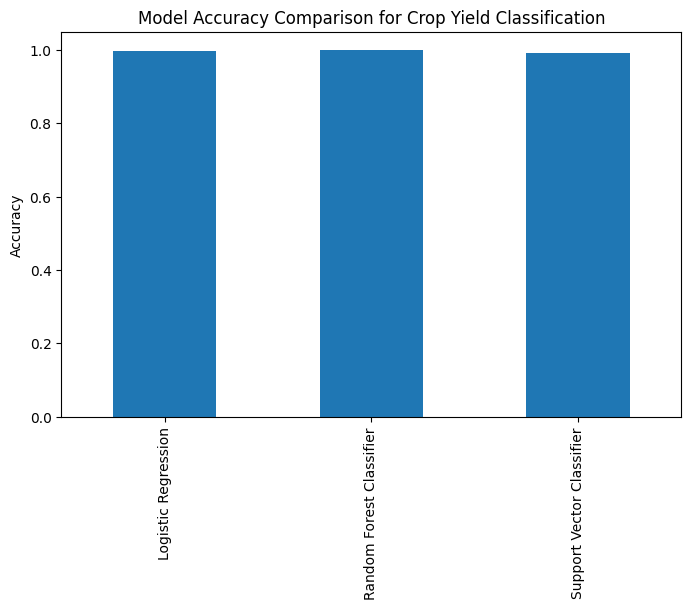

In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Support Vector Classifier": SVC()
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")
    
    # Store the results
    results[model_name] = {"Accuracy": accuracy}

# Display the results for Crop Yield Classification
results_df = pd.DataFrame(results).T
print("Model Performance for Crop Yield Classification:")
print(results_df)

# Step 7: Plot Accuracy Comparison for Crop Yield Classification
results_df['Accuracy'].plot(kind='bar', figsize=(8, 5))
plt.title("Model Accuracy Comparison for Crop Yield Classification")
plt.ylabel("Accuracy")
plt.show()

### Soil Health Classification

Accuracy for Soil Health Classification Model: 0.98
Confusion Matrix for Soil Health Classification:
[[110   5]
 [  3 322]]
Classification Report for Soil Health Classification:
              precision    recall  f1-score   support

   Deficient       0.97      0.96      0.96       115
     Healthy       0.98      0.99      0.99       325

    accuracy                           0.98       440
   macro avg       0.98      0.97      0.98       440
weighted avg       0.98      0.98      0.98       440



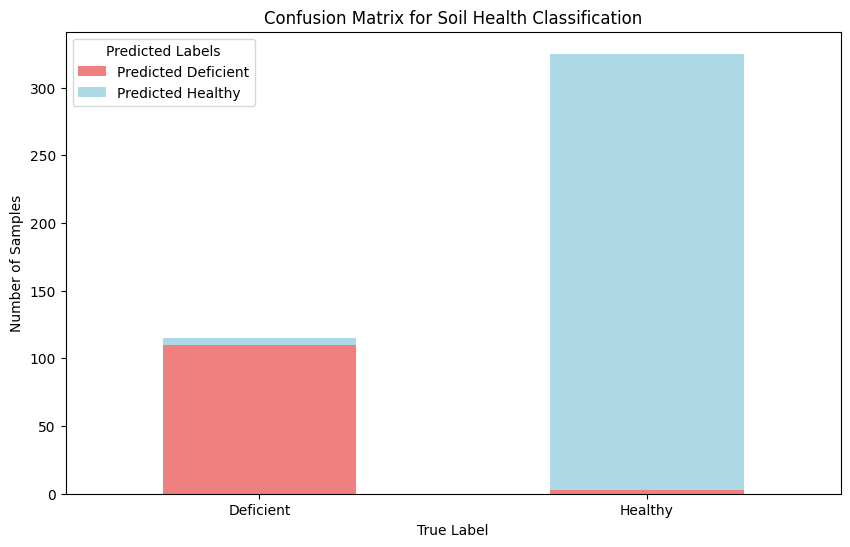

In [35]:
# For this example, we assume 'Soil_Health' is not in the dataset, so we generate it based on conditions
crop_recommendation['Soil_Health'] = np.where(
    (crop_recommendation['Nitrogen'] > 0.5) & (crop_recommendation['Phosphorus'] > 0.5) &
    (crop_recommendation['Potassium'] > 0.5) & (crop_recommendation['pH_Value'] > 6), 'Healthy', 'Deficient'
)

# Features for soil health classification
X_soil = crop_recommendation[['Nitrogen', 'Phosphorus', 'Potassium', 'pH_Value']]
y_soil = crop_recommendation['Soil_Health']

# Step 3: Train-test Split for Soil Health Classification
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(X_soil, y_soil, test_size=0.2, random_state=42)

# Step 4: Data Scaling (Standardization)
scaler = StandardScaler()
X_train_soil = scaler.fit_transform(X_train_soil)  # Fit and transform the training data
X_test_soil = scaler.transform(X_test_soil)  # Transform the test data

# Step 5: Logistic Regression Model for Soil Health Classification
soil_health_model = LogisticRegression(max_iter=500)
soil_health_model.fit(X_train_soil, y_train_soil)

# Step 6: Predicting and Evaluating the Model
y_pred_soil = soil_health_model.predict(X_test_soil)

# Step 7: Evaluation Metrics
accuracy = accuracy_score(y_test_soil, y_pred_soil)
print(f"Accuracy for Soil Health Classification Model: {accuracy:.2f}")
print(f"Confusion Matrix for Soil Health Classification:\n{confusion_matrix(y_test_soil, y_pred_soil)}")
print(f"Classification Report for Soil Health Classification:\n{classification_report(y_test_soil, y_pred_soil)}")

# Step 8: Plot Confusion Matrix for Soil Health
cm_soil = confusion_matrix(y_test_soil, y_pred_soil)
cm_soil_df = pd.DataFrame(cm_soil, index=['Deficient', 'Healthy'], columns=['Predicted Deficient', 'Predicted Healthy'])

cm_soil_df.plot(kind='bar', figsize=(10, 6), stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Confusion Matrix for Soil Health Classification')
plt.ylabel('Number of Samples')
plt.xlabel('True Label')
plt.xticks(rotation=0)
plt.legend(title="Predicted Labels")
plt.show()

### Fertilizer Requirement Classification

Accuracy for Fertilizer Requirement Model: 0.98
Confusion Matrix for Fertilizer Requirement Prediction:
[[109   6]
 [  2 323]]
Classification Report for Fertilizer Requirement Prediction:
              precision    recall  f1-score   support

        High       0.98      0.95      0.96       115
         Low       0.98      0.99      0.99       325

    accuracy                           0.98       440
   macro avg       0.98      0.97      0.98       440
weighted avg       0.98      0.98      0.98       440



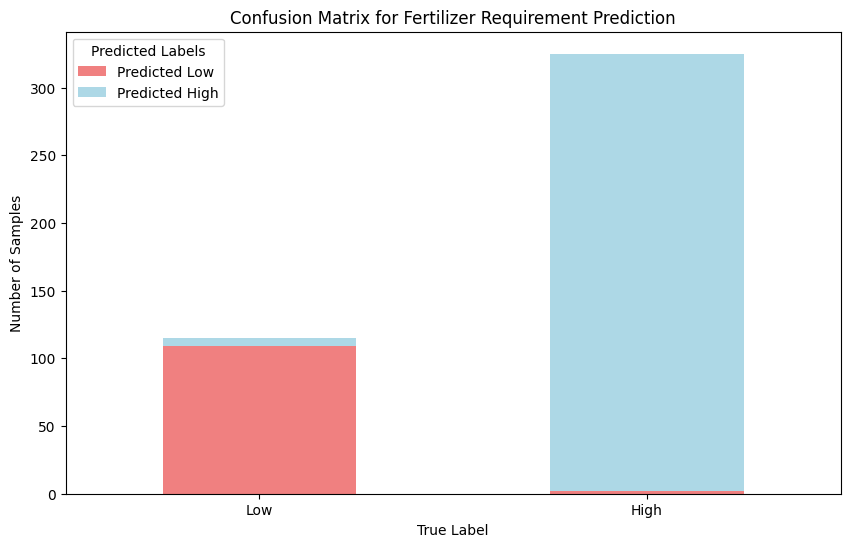

In [36]:
# Step 9: Fertilizer Requirement Prediction based on Soil Health
crop_recommendation['Fertilizer_Need'] = np.where(
    (crop_recommendation['Soil_Health'] == 'Deficient'), 'High', 'Low'
)

X_fertilizer = crop_recommendation[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value']]
y_fertilizer = crop_recommendation['Fertilizer_Need']

X_train_fertilizer, X_test_fertilizer, y_train_fertilizer, y_test_fertilizer = train_test_split(X_fertilizer, y_fertilizer, test_size=0.2, random_state=42)

fertilizer_model = LogisticRegression(random_state=42, max_iter=500)
fertilizer_model.fit(X_train_fertilizer, y_train_fertilizer)

# Predicting and evaluating fertilizer needs
y_pred_fertilizer = fertilizer_model.predict(X_test_fertilizer)
print(f"Accuracy for Fertilizer Requirement Model: {accuracy_score(y_test_fertilizer, y_pred_fertilizer):.2f}")
print(f"Confusion Matrix for Fertilizer Requirement Prediction:\n{confusion_matrix(y_test_fertilizer, y_pred_fertilizer)}")
print(f"Classification Report for Fertilizer Requirement Prediction:\n{classification_report(y_test_fertilizer, y_pred_fertilizer)}")

cm_fertilizer = confusion_matrix(y_test_fertilizer, y_pred_fertilizer)
cm_fertilizer_df = pd.DataFrame(cm_fertilizer, index=['Low', 'High'], columns=['Predicted Low', 'Predicted High'])

cm_fertilizer_df.plot(kind='bar', figsize=(10, 6), stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Confusion Matrix for Fertilizer Requirement Prediction')
plt.ylabel('Number of Samples')
plt.xlabel('True Label')
plt.xticks(rotation=0)
plt.legend(title="Predicted Labels")
plt.show()


### Prediction of different Classifires

In [37]:
def detect_crop_yield_and_soil_health(
    crop, area, production, fertilizer, pesticide, 
    nitrogen, phosphorus, potassium, pH, season, state, annual_rainfall
):
    # Input validation
    if crop not in crop_mapping:
        print(f"Error: Crop '{crop}' not recognized. Please provide a valid crop.")
        return
    if season not in season_mapping:
        print(f"Error: Season '{season}' not recognized. Please provide a valid season.")
        return
    if state not in state_mapping:
        print(f"Error: State '{state}' not recognized. Please provide a valid state.")
        return

    # Encode categorical features
    crop_encoded = crop_mapping[crop]
    season_encoded = season_mapping[season]
    state_encoded = state_mapping[state]

    # Prepare the input features
    features = np.array([
        [crop_encoded, area, production, fertilizer, pesticide, annual_rainfall, season_encoded, state_encoded, pH]
    ])

    # Scale numerical features (ensure scaler was fitted with these columns only)
    numerical_features = features[:, 1:5]  # Extract numerical features for scaling
    try:
        numerical_features_scaled = scaler.transform(numerical_features)
    except ValueError as e:
        print(f"Error scaling features: {e}. Check if the scaler is correctly fitted.")
        return

    # Reshape annual_rainfall for concatenation
    annual_rainfall_array = np.array([[annual_rainfall]])

    # Combine all features into the final scaled feature set
    features_scaled = np.hstack((
        features[:, :1],                # Crop (encoded)
        features[:, 6:8],               # Season and State (encoded)
        numerical_features_scaled,      # Scaled numerical features
        annual_rainfall_array,          # Annual Rainfall
        features[:, 8:9]                # Soil pH
    ))

    # Ensure the shape of the feature set is correct
    if features_scaled.shape[1] != 9:
        print("Error: Feature set does not have the expected shape.")
        return

    # Predict crop yield
    try:
        crop_yield_prediction = models["Random Forest Classifier"].predict(features_scaled)[0]
        print(f"Predicted Crop Yield for '{crop}': {crop_yield_prediction}")
    except Exception as e:
        print(f"Error in predicting crop yield: {e}")
        return

    # Predict soil health
    try:
        soil_health_prediction = soil_health_model.predict([[nitrogen, phosphorus, potassium, pH]])[0]
        print(f"Predicted Soil Health: {soil_health_prediction}")
    except Exception as e:
        print(f"Error in predicting soil health: {e}")
        return

    # Predict fertilizer needs
    try:
        fertilizer_need_prediction = fertilizer_model.predict([[nitrogen, phosphorus, potassium, fertilizer, pesticide, pH]])[0]
        print(f"Predicted Fertilizer Need: {fertilizer_need_prediction}")
    except Exception as e:
        print(f"Error in predicting fertilizer need: {e}")
        return

# Refit scaler if necessary
# Example: scaler.fit(training_data[["area", "production", "fertilizer", "pesticide"]])
# Example use with a valid crop
detect_crop_yield_and_soil_health(
    crop="Rice",  
    area=1500,
    production=2000,
    fertilizer=45,
    pesticide=30,
    nitrogen=0.8,
    phosphorus=0.7,
    potassium=0.6,
    pH=6.5,
    season="Rabi",
    state='Uttar Pradesh',
    annual_rainfall=1000
)

Predicted Crop Yield for 'Rice': Medium
Predicted Soil Health: Healthy
Predicted Fertilizer Need: Low


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
